In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

warnings.filterwarnings('ignore')

In [ ]:
ecommerce_retail=pd.read_excel("/content/ecommerce retail.xlsx")

In [ ]:
ecommerce_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**EDA**

In [ ]:
ecommerce_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
ecommerce_retail.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
ecommerce_retail=ecommerce_retail[ecommerce_retail['UnitPrice'] > 0]
ecommerce_retail=ecommerce_retail[ecommerce_retail['Quantity'] > 0]



In [ ]:
ecommerce_retail.duplicated().sum()
ecommerce_retail.drop_duplicates(inplace=True)

In [ ]:
ecommerce_retail['StockCode'] = (
    ecommerce_retail['StockCode']
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)
    .replace('', None))

Chỉnh StockCode về mã chỉ có 5 số nguyên và không có kí tự

In [ ]:
ecommerce_retail['CustomerID'] = (
    ecommerce_retail['CustomerID']
    .fillna(0)
    .replace([np.inf, -np.inf], 0)
    .astype(float)
    .round(0)
    .astype('int64')
)


Chỉnh CustomerID về dạng int và thay thế các giá trị null bằng 0

In [ ]:
ecommerce_retail.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
ecommerce_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,524878.000000,524878,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,11437.732164
min,1.000000,2010-12-01 08:26:00,0.001000,0.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,0.000000
50%,4.000000,2011-07-20 11:22:00,2.080000,14350.000000
75%,11.000000,2011-10-19 11:41:00,4.130000,16245.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.280031,NaN,36.093028,6799.513627


In [ ]:
ecommerce_retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


**ANALYSIS,DATA PROCESSING**


Tính R,F,M

In [ ]:
reference_date = pd.to_datetime('2011-12-31')
recency_df = ecommerce_retail.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (reference_date - recency_df['InvoiceDate']).dt.days


In [ ]:
frequency_df = ecommerce_retail.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']


In [ ]:
ecommerce_retail['Monetary'] = ecommerce_retail['Quantity'] * ecommerce_retail['UnitPrice']
monetary_df =ecommerce_retail.groupby('CustomerID')['Monetary'].sum().reset_index()

In [ ]:
rfm_df = recency_df.merge(frequency_df, on='CustomerID', how='left') \
                   .merge(monetary_df, on='CustomerID', how='left')

rfm_df['R'] = pd.qcut(rfm_df['Recency'].rank(method='first'), 5, labels=[5, 4, 3, 2, 1])
rfm_df['F'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M'] = pd.qcut(rfm_df['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_df['RFM'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)
score_df = rfm_df[['CustomerID','Recency','Frequency','Monetary', 'R', 'F', 'M','RFM']]
score_df

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,0,21,1428,1754901.91,5,5,5,555
1,12346,346,1,77183.60,1,1,5,115
2,12347,23,7,4310.00,5,5,5,555
3,12348,96,4,1797.24,2,4,4,244
4,12349,39,1,1757.55,4,1,4,414
...,...,...,...,...,...,...,...,...
4334,18280,298,1,180.60,1,2,1,121
4335,18281,201,1,80.82,1,2,1,121
4336,18282,28,2,178.05,5,3,1,531
4337,18283,24,16,2045.53,5,5,4,554


In [ ]:
score_df['RFM'].astype(int)

,RFM
0,555
1,115
2,555
3,244
4,414
...,...
4334,121
4335,121
4336,531
4337,554


In [ ]:
def segment_rfm(df):
    if df in ['555','554','544','545','454','455','445']:
        return 'Champions'
    elif df in ['543','444','435','355','354','345','344','445']:
        return 'Loyal'
    elif df in ['553','551','552','541','542','533','532','531','452','451','442','441','431','453','433','423','353','352','351','342','341','333','323']:
        return 'Potential Loyalist'
    elif df in ['512','511','421','422','412','411','311']:
        return 'New Customers'
    elif df in ['525','524','523','522','521','515','514','513','425','424','413','414','415','315','314','313']:
        return 'Promising'
    elif df in ['535','534','443','434','343','334','325','324']:
        return 'Need Attention'
    elif df in ['331','321','312','221','213','231','241','251']:
        return 'About To Sleep'
    elif df in ['255','254','245','244','253','252','243','242','235','234','225','224','153','152','145','143','142','135','134','133','125','124']:
        return 'At Risk'
    elif df in ['155','154','144','214','215','115','114','113']:
        return 'Cannot Lose Them'
    elif df in ['332','322','233','232','223','222','132','123','122','212','211']:
        return 'Hibernating customers'
    else:
        return 'Lost customers'
score_df['Segment']=score_df['RFM'].apply(segment_rfm)
score_df.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Segment
0,0,21,1428,1754901.91,5,5,5,555,Champions
1,12346,346,1,77183.60,1,1,5,115,Cannot Lose Them
2,12347,23,7,4310.00,5,5,5,555,Champions
3,12348,96,4,1797.24,2,4,4,244,At Risk
4,12349,39,1,1757.55,4,1,4,414,Promising
5,12350,331,1,334.40,1,1,2,112,Lost customers
6,12352,57,8,2506.04,3,5,5,355,Loyal
7,12353,225,1,89.00,1,1,1,111,Lost customers
8,12354,253,1,1079.40,1,1,4,114,Cannot Lose Them
9,12355,235,1,459.40,1,1,2,112,Lost customers


**Visualization**

In [ ]:
ecommerce_re=ecommerce_retail.merge(score_df, on='CustomerID', how='left')
ecommerce_re['CustomerID'] !=0
ecommerce_re.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary_x,Recency,Frequency,Monetary_y,R,F,M,RFM,Segment
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,393,34,5391.21,1,5,5,155,Cannot Lose Them
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,393,34,5391.21,1,5,5,155,Cannot Lose Them
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,393,34,5391.21,1,5,5,155,Cannot Lose Them
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,393,34,5391.21,1,5,5,155,Cannot Lose Them
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,393,34,5391.21,1,5,5,155,Cannot Lose Them
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,393,34,5391.21,1,5,5,155,Cannot Lose Them
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,393,34,5391.21,1,5,5,155,Cannot Lose Them
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,393,34,5391.21,1,5,5,155,Cannot Lose Them
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,393,34,5391.21,1,5,5,155,Cannot Lose Them
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,52,10,3237.54,4,5,5,455,Champions


In [ ]:
ecommerce_re['FM'] = ecommerce_re['F'].astype(int) + ecommerce_re['M'].astype(int)
treemap_data = ecommerce_re.groupby(['R', 'FM', 'Segment']) \
                       .agg(CustomerCount=('CustomerID', 'count')) \
                       .reset_index()
fig = px.treemap(
    treemap_data,
    path=[px.Constant('RFM Segmentation'),'Segment'],
    values='CustomerCount',
    color='Segment',
    title='Treemap of Customer Segments (RFM)',
)

fig.update_traces(root_color="lightgrey")
fig.show()

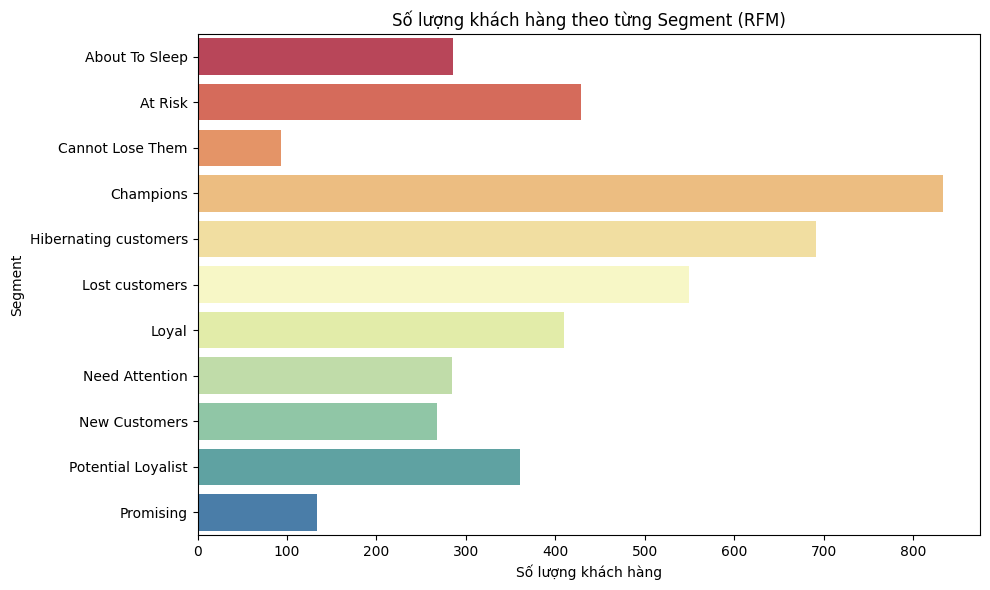

In [ ]:
segment_counts = ecommerce_re.groupby('Segment')['CustomerID'].nunique().reset_index(name='CustomerCount')

plt.figure(figsize=(10,6))
sns.barplot(data=segment_counts, x='CustomerCount', y='Segment', palette='Spectral')
plt.title('Số lượng khách hàng theo từng Segment (RFM)')
plt.xlabel('Số lượng khách hàng')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

-Tỉ lệ Champion cao nhất là tín hiệu tích cực vì điều đó chứng tỏ khách hàng mua hàng liên tục và giá trị hàng hoá khá cao bên cạnh đó những tỉ lệ khách hàng có chỉ số RFM thấp cũng chiếm đa số !!

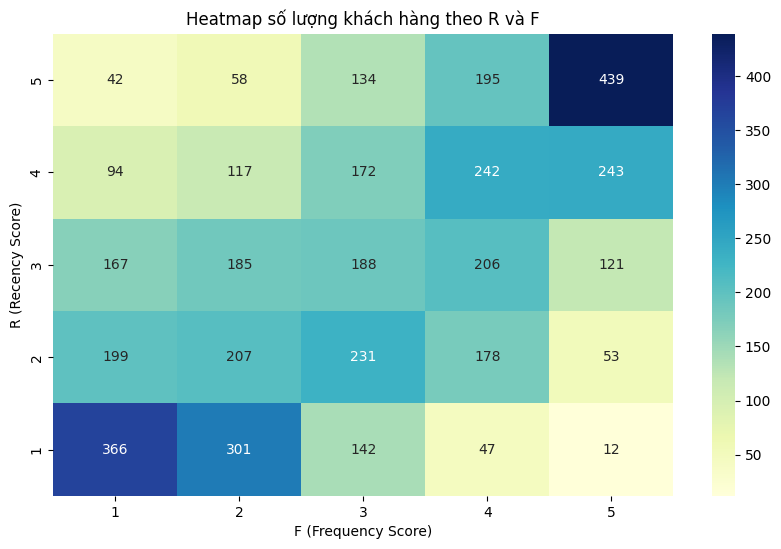

In [ ]:
rf_heatmap = ecommerce_re.groupby(['R', 'F'])['CustomerID'].nunique().unstack().fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(rf_heatmap, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap số lượng khách hàng theo R và F')
plt.xlabel('F (Frequency Score)')
plt.ylabel('R (Recency Score)')
plt.show()

-Phân bố khách hàng dựa trên chỉ số Recency và Ferquency ta thấy được số lượng khách hàng mua hàng liên tục và thường xuyên ở mức cao 439 là 1 dấu hiệu tích cực nhưng bên cạnh đó tỉ lệ khách hàng chỉ mua hàng 1 lần và không thường xuyên lại chiềm tổng số lượng cao nhất đó là 366 và 301

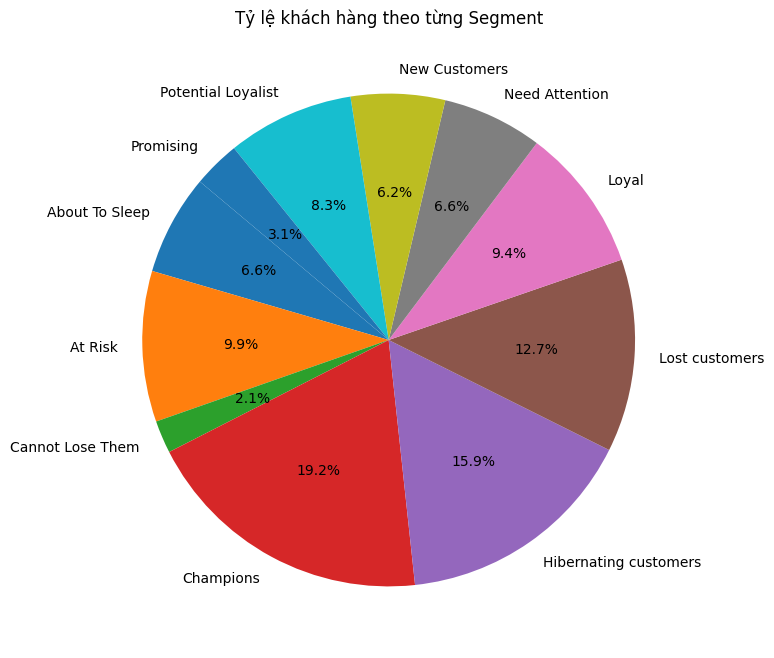

In [ ]:
segment_counts = ecommerce_re.groupby('Segment')['CustomerID'].nunique().reset_index(name='CustomerCount')

plt.figure(figsize=(8,8))
plt.pie(segment_counts['CustomerCount'], labels=segment_counts['Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ khách hàng theo từng Segment')
plt.show()

-Ở biểu đồ này ta thấy rõ hơn sự phân bố của các segment với chỉ số tích cực Champion chiếm tỷ lệ lớn nhất nhưng 2 chỉ số tiêu cực cũng đứng ngay sau với tỉ lệ 15,9% và 12,7%

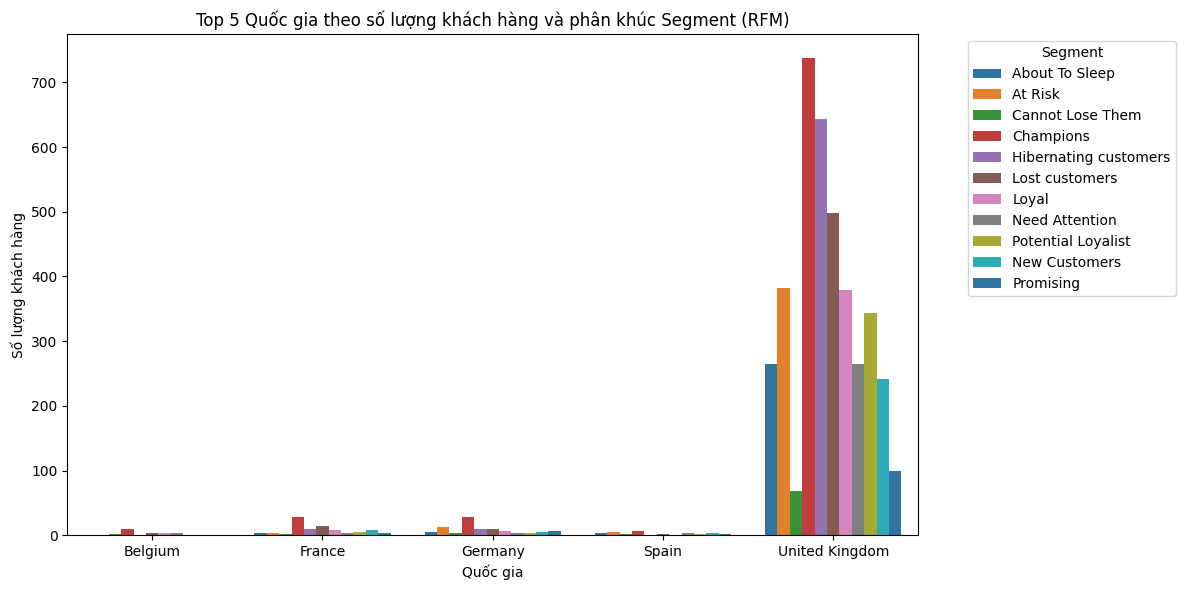

In [ ]:
top_countries = ecommerce_re.groupby('Country')['CustomerID'].nunique() \
    .sort_values(ascending=False).head(5).index.tolist()
filtered_data = ecommerce_re[ecommerce_re['Country'].isin(top_countries)]
country_segment = filtered_data.groupby(['Country', 'Segment'])['CustomerID'].nunique().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=country_segment, x='Country', y='CustomerID', hue='Segment', palette='tab10')

plt.title('Top 5 Quốc gia theo số lượng khách hàng và phân khúc Segment (RFM)')
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng khách hàng')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

-Thị trường chủ yếu là UK chiếm số lượng gần như là chủ yếu các thị trường khác chiếm số lượng rất ít (không đáng kể)

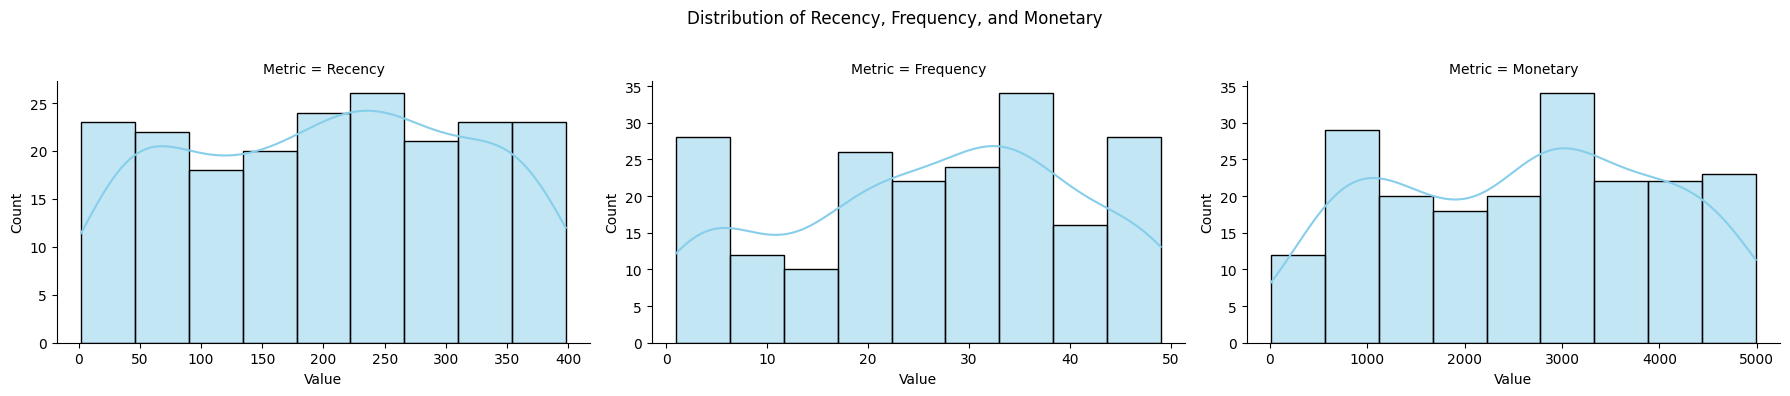

In [ ]:
np.random.seed(42)
joined = pd.DataFrame({
    'Recency': np.random.randint(1, 400, 200),
    'Frequency': np.random.randint(1, 50, 200),
    'Monetary': np.random.randint(10, 5000, 200)
})
melted_df = joined[['Recency', 'Frequency', 'Monetary']].melt(var_name='Metric', value_name='Value')
g = sns.FacetGrid(melted_df, col="Metric", sharex=False, sharey=False, height=4, aspect=1.5)
g.map(sns.histplot, "Value", kde=True, color='skyblue')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Recency, Frequency, and Monetary')

plt.show()


* Recency:phân bố đều tức là có nhiều khách hàng gần đây vẫn còn hoạt động, cho thấy công ty có lượng khách hàng quay lại thường xuyên.
* Frequency:Đa phần khách hàng có tần suất mua thấp giao dịch lặp lại ít.
* Monetary: Phân phối rộng, nhưng vẫn có nhiều khách chi tiêu ở mức thấp









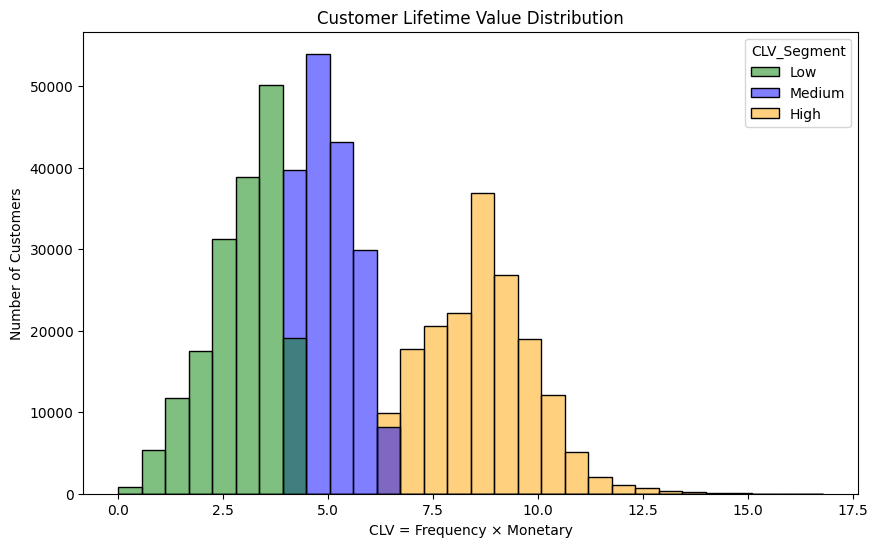

In [ ]:
ecommerce_re['CLV'] = ecommerce_re['Frequency'] * ecommerce_re['Monetary_x']
ecommerce_re['CLV_log'] = np.log1p(ecommerce_re['CLV'])
if ecommerce_re['CLV_log'].isnull().any():
    print("Warning: Some CLV_log values are NaN. Check data for zeros or invalid entries.")
else:

    ecommerce_re['CLV_Segment'] = pd.qcut(ecommerce_re['CLV_log'], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')
plt.figure(figsize=(10,6))
sns.histplot(data=ecommerce_re, x='CLV_log', hue='CLV_Segment', bins=30, palette=['green', 'blue', 'orange'])
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('CLV = Frequency × Monetary')
plt.ylabel('Number of Customers')
plt.show()

Đa phần khách hàng nằm ở nhóm Low và Medium CLV → khách hàng giá trị thấp và vừa chiếm tỷ lệ cao.Chỉ một phần nhỏ thuộc nhóm High CLV, dù đây là nhóm sinh lợi cao nhất.Công ty đang phụ thuộc nhiều vào khách hàng có giá trị thấp.

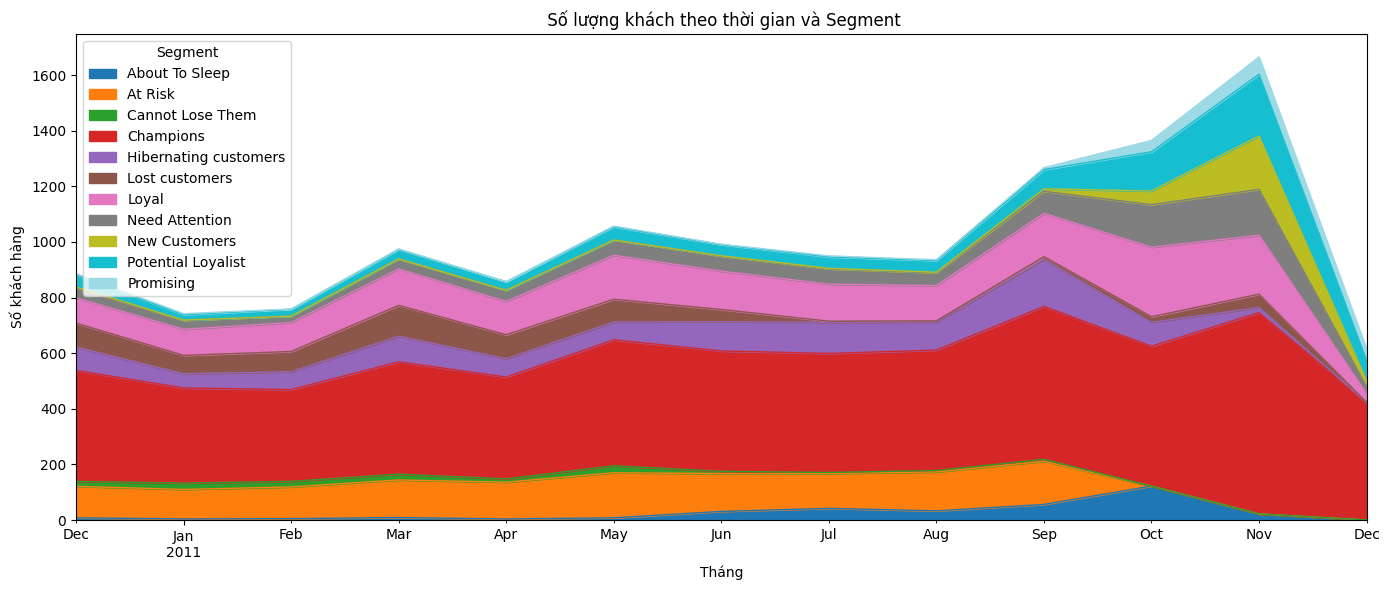

In [ ]:
ecommerce_re['InvoiceDate'] = pd.to_datetime(ecommerce_re['InvoiceDate'])
ecommerce_re['InvoiceMonth'] = ecommerce_re['InvoiceDate'].dt.to_period('M').dt.to_timestamp()
segment_trend = ecommerce_re.groupby(['InvoiceMonth', 'Segment'])['CustomerID'].nunique().reset_index()
segment_pivot = segment_trend.pivot(index='InvoiceMonth', columns='Segment', values='CustomerID').fillna(0)
segment_pivot.plot.area(figsize=(14,6), colormap='tab20', linewidth=1)
plt.title(' Số lượng khách theo thời gian và Segment')
plt.xlabel('Tháng')
plt.ylabel('Số khách hàng')
plt.tight_layout()
plt.show()



1. Công ty có khả năng thu hút khách hàng mới và duy trì nhóm "Champions" trong mùa cao điểm, cho thấy chiến lược tiếp thị hiệu quả.
2. Tỷ lệ khách hàng "Lost" và "Hibernating" cao, đặc biệt vào cuối năm, cho thấy vấn đề trong việc giữ chân khách hàng dài hạn.



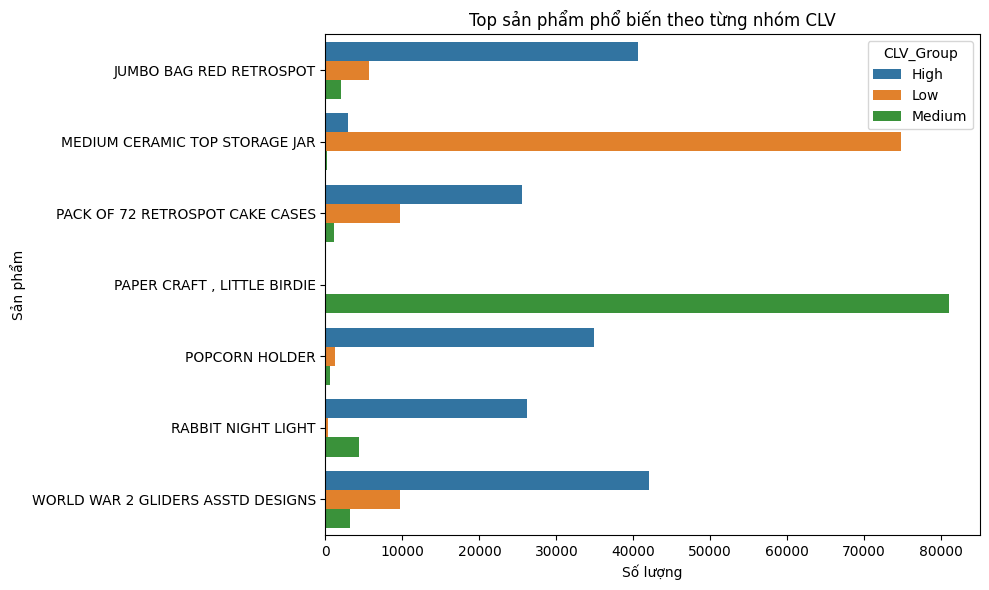

In [ ]:
top_sp = (
    ecommerce_re.groupby(['CLV_Group', 'Description'])['Quantity']
    .sum().reset_index()
    .sort_values(['CLV_Group', 'Quantity'], ascending=[True, False])
    .groupby('CLV_Group').head(3)
)
top_descriptions = top_sp['Description'].unique()
filtered_df = ecommerce_re[ecommerce_re['Description'].isin(top_descriptions)]
grouped = filtered_df.groupby(['Description', 'CLV_Group'])['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Quantity', y='Description', hue='CLV_Group')
plt.title('Top sản phẩm phổ biến theo từng nhóm CLV')
plt.xlabel('Số lượng'); plt.ylabel('Sản phẩm')
plt.tight_layout()
plt.show()



*   Low CLV: Chiếm ưu thế ở hầu hết các sản phẩm, đặc biệt là "MEDIUM CERAMIC TOP STORAGE JAR", cho thấy khách hàng giá trị thấp mua số lượng lớn nhưng giá trị mỗi giao dịch thấp.
*   Medium CLV: Tập trung ở "PAPER CRAFT, LITTLE BIRDIE", cho thấy nhóm này quan tâm đến sản phẩm thủ công hoặc giá trị trung bình..
*   High CLV: Chỉ nổi bật ở "JUMBO BAG RETROSPOT", cho thấy khách hàng giá trị cao ưu tiên sản phẩm có giá trị cao hơn.

---> Phân bổ sản phẩm không đồng đều, với nhóm "High CLV" chỉ tập trung vào một sản phẩm, cho thấy thiếu sản phẩm đa dạng để giữ chân khách hàng giá trị cao.





**Phân tích hiện trạng của công ty**

*  Tần suất mua hàng của khách hàng còn thấp (Frequency thấp):

Gợi ý khách hàng mua một lần rồi dừng lại, chưa tạo thói quen mua lại.

Đây là điểm yếu lớn nếu muốn xây dựng mô hình khách hàng trung thành.

*   Chi tiêu bình quân không cao (Monetary phân tán):

Nhiều khách chi tiêu thấp → có thể đang chọn hàng khuyến mãi, sản phẩm rẻ.

*   Mặc dù 'Champion' chiếm phần lớn nhất nhưng 'Lost Customer' và 'Hibernating Customer' là 2 segment khiến customer life value phân bố ở mức medium và low

*   Mùa cao điểm hiệu quả: Số lượng khách hàng "Champions" và "Loyal customers" tăng mạnh từ tháng 5-8, cho thấy Superstore tận dụng tốt các dịp mua sắm lớn (có thể là Giáng sinh hoặc Black Friday).

*   Sản phẩm best-seller: "MEDIUM CERAMIC TOP STORAGE JAR" và "PAPER CRAFT, LITTLE BIRDIE" bán chạy, mang lại doanh thu ổn định từ nhóm "Low" và "Medium" CLV.

*   Khả năng thu hút khách mới: Sự gia tăng "New Customers" và "Promising" vào đầu năm cho thấy chiến lược tiếp thị ban đầu thành công.
*   Giảm sút sau mùa cao điểm: Sự gia tăng "About to Sleep" và "At Risk" từ tháng 9-12 cho thấy khó khăn trong việc duy trì khách hàng sau mùa vụ.






**Gợi ý cho team Marketing**



1.   Sử dụng phân tích RFM để gửi thông điệp phù hợp: ví dụ, giảm giá cho "Hibernating customers" với thông điệp khôi phục mối quan hệ.
1.   Quảng bá sản phẩm giá trị cao như "JUMBO BAG RETROSPOT" qua các chiến dịch trên mạng xã hội, nhắm đến nhóm "Champions" và "Potential Loyalists".
2.   Chạy chiến dịch khuyến mãi vào tháng 9-12, tập trung vào "New Customers" và "Promising" với sản phẩm như "PAPER CRAFT, LITTLE BIRDIE" để chuyển đổi thành "Loyal customers".
1.   Sử dụng quảng cáo mùa lễ hội (Halloween, Giáng sinh) để kích cầu
2.   Ưu tiên theo dõi Recency để nhận diện và can thiệp kịp thời với nhóm "At Risk" và "About to Sleep", đặc biệt là những khách hàng có Recency > 90 ngày.






**Gợi ý cho team Marketing và Sales với mô hình bán lẻ Superstore**

*  Nhóm khách hàng chủ yếu: "Champions" và "Potential Loyalists" là hai nhóm quan trọng nhất. "Champions" mang lại giá trị cao nhất (High CLV), trong khi "Potential Loyalists" là nguồn tăng trưởng tiềm năng nếu được giữ chân thành công.
*   Chỉ số quan trọng nhất: Recency (R):

Lý do: Tỷ lệ "Lost customers" và "Hibernating customers" cao (400-600 khách hàng) cho thấy vấn đề giữ chân là cấp bách. Cải thiện Recency sẽ giúp kéo dài vòng đời khách hàng, từ đó tăng Frequency và Monetary.

Hành động:
Marketing: Theo dõi khách hàng có Recency > 90 ngày, gửi thông báo giảm giá hoặc nội dung cá nhân hóa nhắm đến "Potential Loyalists".
Sales: Ưu tiên liên hệ với "Champions" và "Potential Loyalists" có Recency cao để chốt đơn, kết hợp với sản phẩm "High CLV" như "JUMBO BAG RETROSPOT" hoặc "PAPER CRAFT, LITTLE BIRDIE".


---> Nhóm khách hàng chủ yếu là "Champions" và "Potential Loyalists", và đội Marketing nên tập trung vào Recency để tối ưu hóa chiến lược giữ chân và tăng trưởng!

